In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import emoji
import re


Load and Parse the Chat Data

In [17]:
with open('whatsapp_chat.txt', 'r', encoding='utf-8') as file:
    data = file.readlines()


pattern = r'(\d+/\d+/\d+, \d+:\d+ [APM]+) - ([^:]+): (.+)'
messages = []

for line in data:
    match = re.match(pattern, line)
    if match:
        date, user, message = match.groups()
        messages.append([date, user, message])

df = pd.DataFrame(messages, columns=['date', 'user', 'message'])
df['date'] = pd.to_datetime(df['date'])
df.head()


C:\Users\gupta\AppData\Local\Temp\ipykernel_16924\1143835327.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,date,user,message
0,2025-03-20 09:00:00,Charlie,Oh yesss That one’s wild 🙌😎
1,2025-03-20 09:03:00,Alice,Don't forget the charger 😂
2,2025-03-20 09:02:00,Bob,Did you see the news today? 👽
3,2025-03-20 09:09:00,Alice,What time are we meeting? 🧃🧃
4,2025-03-20 09:12:00,Bob,Good luck with the interview! 🙌🙌


Exploratory Data Analysis (EDA)


Basic Statistics

In [18]:
print("Total Messages:", df.shape[0])
print("Total Participants:", df['user'].nunique())
print("Chat Duration:", df['date'].min(), "to", df['date'].max())


Total Messages: 974
Total Participants: 3
Chat Duration: 2025-03-20 09:00:00 to 2025-03-23 19:10:00


Messages Per User

In [19]:
user_message_count = df['user'].value_counts()
user_message_count



user
Alice      350
Charlie    328
Bob        296
Name: count, dtype: int64

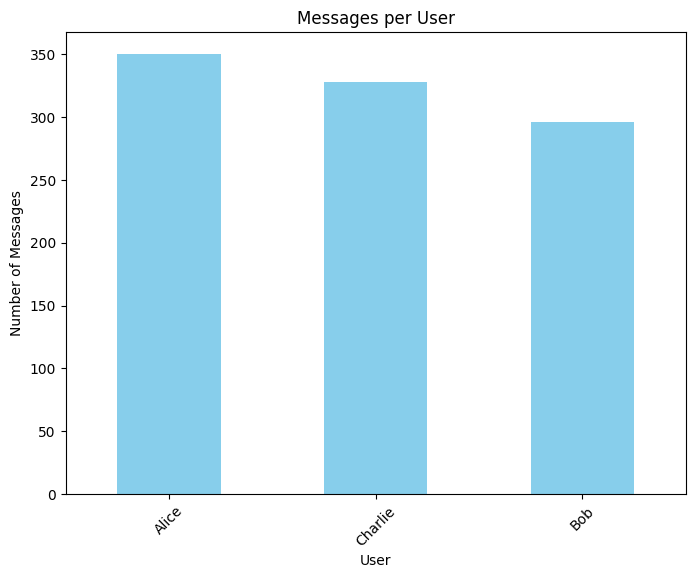

In [20]:
#PLOT
user_message_count.plot(kind='bar', figsize=(8,6), color='skyblue')
plt.title('Messages per User')
plt.ylabel('Number of Messages')
plt.xlabel('User')
plt.xticks(rotation=45)
plt.show()


Most Common Words

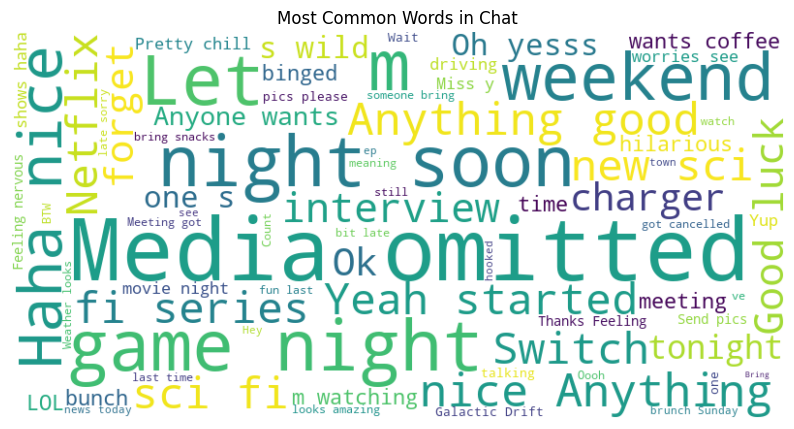

In [21]:
from wordcloud import WordCloud

text = " ".join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words in Chat')
plt.show()


Emoji Analysis

In [22]:
all_emojis = []
for message in df['message']:
    all_emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

emoji_counter = Counter(all_emojis)
emoji_counter.most_common(10)


[('😎', 148),
 ('🔥', 139),
 ('👽', 130),
 ('🥞', 120),
 ('🚀', 119),
 ('😊', 113),
 ('🍳', 111),
 ('🧃', 106),
 ('😂', 101),
 ('🙌', 100)]

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128125 (\N{EXTRATERRESTRIAL ALIEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129374 (\N{PANCAKES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152:

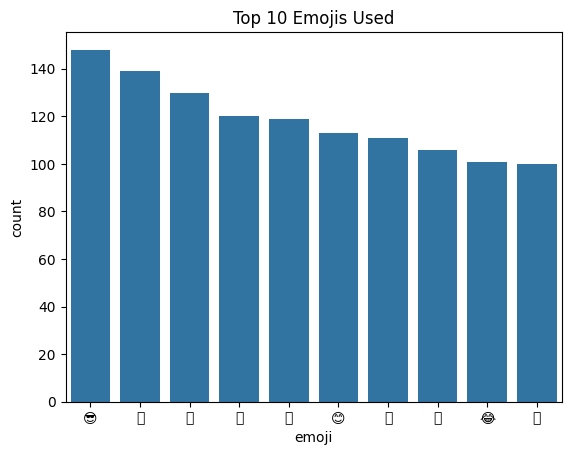

In [23]:
emoji_df = pd.DataFrame(emoji_counter.items(), columns=['emoji', 'count']).sort_values('count', ascending=False)
sns.barplot(x='emoji', y='count', data=emoji_df.head(10))
plt.title('Top 10 Emojis Used')
plt.show()


Message Timeline

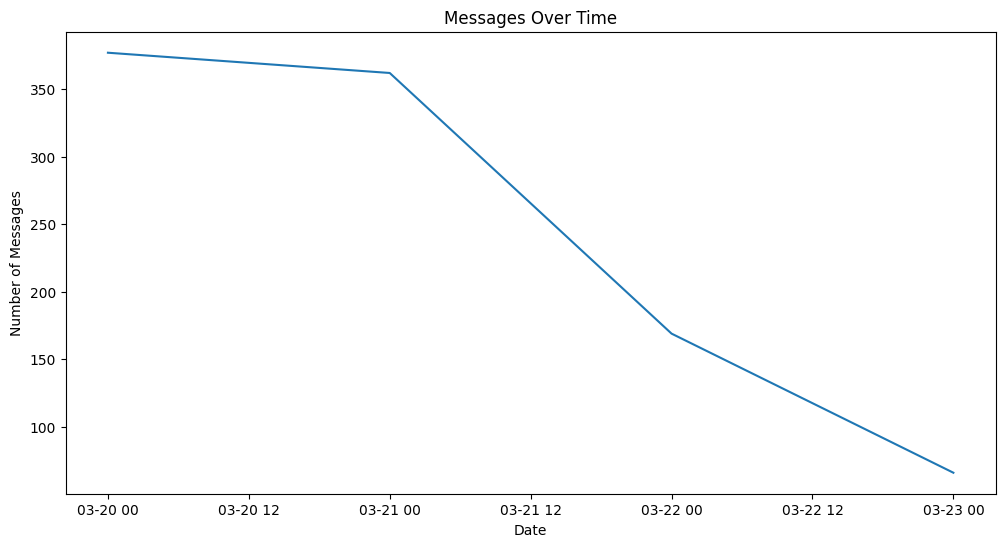

In [24]:
df['only_date'] = df['date'].dt.date
daily_messages = df.groupby('only_date').count()['message']

daily_messages.plot(figsize=(12,6))
plt.title('Messages Over Time')
plt.ylabel('Number of Messages')
plt.xlabel('Date')
plt.show()


In [25]:
# Conclusion


# This WhatsApp chat analysis showed interesting social interaction patterns:

# Certain users dominate conversations.

# Emojis are frequently used to express emotions and tone.

# Conversations mostly revolve around casual topics like TV shows, outings, and general life updates.

# Peak chat activity is clustered around weekends, reflecting free time and social planning.

# This type of analysis can be extended to larger datasets for deeper social behavior studies, sentiment analysis, or building AI-driven conversational models.